In [2]:
import torch

In [34]:
# Average Euclidean center of all image outputs for each culture using best model
culture_tensors = {
    "american" : torch.tensor([[ 7.0664,  1.6778, -1.8836, -0.8605, -1.1828,  0.9407, -0.0519, -1.8947, -1.8577, -0.9771, -0.6822]]),
    "british" : torch.tensor([[ 1.3715e+00,  3.6504e+00, -2.1580e+00, -2.0042e-03,  3.3697e-01, 2.0065e+00,  9.8763e-01, -2.6181e+00, -1.0272e+00, -2.6346e+00, -2.5038e-01]]),
    "chinese" : torch.tensor([[-0.6801, -1.5646,  7.2309, -1.5411, -1.5731, -0.1273, -1.0995,  0.2166, -1.4205,  2.1701, -0.9345]]),
    "dutch" : torch.tensor([[-0.7726,  0.0573, -2.4268,  3.7708,  0.8802,  1.4279,  1.2017, -3.0107, 1.2312, -3.2050,  0.4194]]),
    "flemish" : torch.tensor([[-0.5941,  0.9288, -2.2716,  1.5399,  1.8579,  1.8715,  0.8328, -2.9006, 1.2896, -2.9780,  0.3761]]),
    "french" : torch.tensor([[ 0.2759,  0.8285, -2.0896,  0.7542,  0.6249,  3.9568,  0.4689, -3.0201, 0.2730, -2.1955, -0.0474]]),
    "german" : torch.tensor([[-0.1850,  0.7377, -2.0441,  1.2382,  0.3095,  1.1902,  1.7258, -2.0748, 1.1933, -2.6024,  0.3569]]),
    "indian" : torch.tensor([[-0.6212, -2.5173,  1.3177, -2.3141, -2.8249, -1.3583, -0.5100,  7.6875, -0.5083,  0.6289,  0.6106]]),
    "italian" : torch.tensor([[-1.8449, -1.1914, -2.2632,  0.9813,  0.5290,  0.8880,  1.4288, -1.7552, 5.1137, -2.9153,  0.9664]]),
    "japanese" : torch.tensor([[ 0.1553, -2.1064,  2.4003, -2.0872, -2.0149, -0.1749, -1.4981,  0.2818, -1.4746,  8.0753, -0.9232]]),
    "spanish" : torch.tensor([[-0.6073, -0.2381, -1.3960,  0.5750,  0.0869,  1.0328,  0.6943, -0.9015, 0.9975, -2.0954,  1.6449]])
}

culture_categories_list = ["american",
                           "british",
                           "chinese",
                           "dutch",
                           "flemish",
                           "french",
                           "german",
                           "indian",
                           "italian",
                           "japanese",
                           "spanish"]

In [35]:
def compute_distance_between_cultures(culture1, culture2):
    '''Computes the Euclidean distance between two culture centers'''
    return torch.dist(culture_tensors[culture1], culture_tensors[culture2]).item()

def compute_all_distances_from_culture(culture1):
    '''Computes the Eucliean distance of all cultures from the specified culture'''
    results = []
    for culture2 in culture_categories_list:
        results.append((culture2, compute_distance_between_cultures(culture1, culture2)))
    
    return [x[1] for x in results]

In [350]:
culture_distances = []
for culture in culture_categories_list:
    culture_distances.append(compute_all_distances_from_culture(culture))
    
for row in range(len(culture_distances)):
    # Apply function to each value
    for col in range(len(culture_distances[row])):
        if not (abs(culture_distances[row][col]) <= 0.00000001):
            culture_distances[row][col] = (1/culture_distances[row][col]**5)*10000
            
print(culture_distances)

[[0.0, 0.7041040804913669, 0.026126913890875698, 0.08089892115121033, 0.12286788353134752, 0.24557285239252352, 0.19594905894835893, 0.018798717408424627, 0.03545577192485212, 0.02545575523266843, 0.16011853553734343], [0.7041040804913669, 0.0, 0.02807045293468163, 1.0860269205854574, 4.417886130146166, 9.7934958880144, 6.138549045675308, 0.017487698450727663, 0.196884031308188, 0.017682331372963635, 1.7296742318345637], [0.026126913890875698, 0.02807045293468163, 0.0, 0.021185362099901673, 0.026229905523543068, 0.032930318185952344, 0.036848053407961295, 0.09679015871882281, 0.021223628474823907, 0.3607193219103204, 0.06348635358468732], [0.08089892115121033, 1.0860269205854574, 0.021185362099901673, 0.0, 73.15142349694368, 5.548171731363203, 38.22087766051377, 0.014869012193512091, 2.4068789522433227, 0.012655159743940972, 5.827918410762714], [0.12286788353134752, 4.417886130146166, 0.026229905523543068, 73.15142349694368, 0.0, 38.34474214229145, 194.18978798282697, 0.017204760562428

100%|███████████████████████████████████████████████████████████████████████| 200000/200000 [00:05<00:00, 33516.89it/s]

BarnesHut Approximation  took  1.61  seconds
Repulsion forces  took  2.25  seconds
Gravitational forces  took  0.27  seconds
Attraction forces  took  0.21  seconds
AdjustSpeedAndApplyForces step  took  0.88  seconds


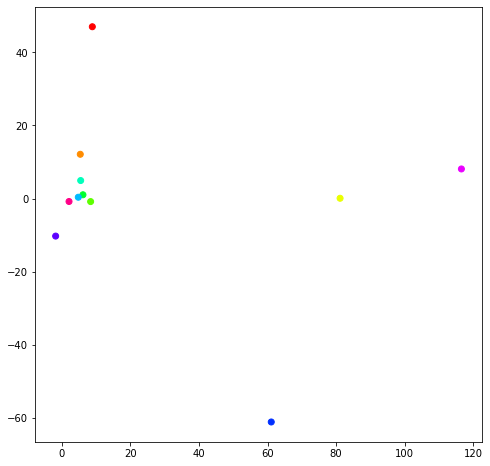

In [351]:
# import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt
import numpy as np

G = np.array(culture_distances)
pos = np.array([[-30,2],
               [-10,10],
               [30,0],
               [-3,7],
               [-5,5],
               [-7,0],
               [0,6],
               [20,-10],
               [5,-5],
               [35,5],
               [-10,-5]])

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2(G, pos=pos, iterations=200000)

# positions = [[-30,2],
#                [-10,10],
#                [30,0],
#                [-3,7],
#                [-5,5],
#                [-7,0],
#                [0,6],
#                [20,-10],
#                [5,-5],
#                [35,5],
#                [-10,-5]]

x = [point[0] for point in positions]
y = [point[1] for point in positions]

colors = colors = ["#ff0000", "#ff8c00", "#eaff00", "#5eff00", "#00ff2f", "#00ffbb", "#00bbff", "#002fff", "#5d00ff", "#ea00ff", "#ff0088"]

plt.scatter(x, y, c=colors)

fig = plt.gcf()
fig.set_size_inches(8,8)

# ax = plt.gca()
# ax.set_xlim([-50,50])
# ax.set_ylim([-50,50])

# nx.draw_networkx_nodes(G, positions, node_size=20, with_labels=False, node_color="blue", alpha=0.4)
# nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.05)

# plt.axis('off')
plt.show()

# equivalently
# import igraph
# G = igraph.Graph.TupleList(G.edges(), directed=False)
# layout = forceatlas2.forceatlas2_igraph_layout(G, pos=None, iterations=2000)
# igraph.plot(G, layout).show()